In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

In [20]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
def add_edges(Graph, nodes:list):
    e_1 = []
    for v in nodes:
        edges = list(nx.neighbors(Graph, v))
        if (len(edges) > 0):
            e_1.append(edges)
    e_1 = [item for sublist in e_1 for item in sublist]
    return list(set(nodes + e_1))

def MCS(N, sub_sample_size, Nsim, p):
    # define the population:
    graph = nx.erdos_renyi_graph(N, p)
    vertices = graph.nodes
    edges = graph.edges

    # Monte Carlo
    for i in range(Nsim):
        v_0 = random.sample(vertices, sub_sample_size)
        #print(v_0)
        v_1 = []
        v_2 = []
        
        v_1 = add_edges(graph, v_0)
        v_2 = add_edges(graph, v_1)
        degrees = [nx.degree(graph, item) for item in v_2 ]
        number_of_neighbors_second_order = [len(nx.single_source_shortest_path_length(graph, item, cutoff=2)) for item in v_2]
        
        ordered_vertices_degrees = [x for _,x in sorted(zip(degrees,v_2))]
        #print(ordered_vertices_degrees)
        #print(v_2)
        ordered_vertices_2nd_ord_neighbors = [x for _,x in sorted(zip(number_of_neighbors_second_order,v_2))]

        
        
        # create plot
        n_groups = len(v_2)
        fig, ax = plt.subplots()
        index = np.arange(n_groups)
        bar_width = 0.5
        opacity = 0.8
        
        rects1 = plt.bar(index, degrees, bar_width,
        alpha=opacity,
        color='b',
        label='Degree')

        rects2 = plt.bar(index + bar_width, number_of_neighbors_second_order, bar_width,
        alpha=opacity,
        color='g',
        label='Second order neighbours')

        plt.xlabel('Vertices')
        plt.ylabel('')
        plt.title('Degree an Second order neighbors')
        #plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
        plt.legend()

        plt.tight_layout()
        
        plt.show()
        
        
        n_groups = len(v_2)
        fig, ax = plt.subplots()
        index = np.arange(n_groups)
        bar_width = 0.5
        opacity = 0.8
        
        rects1 = plt.bar(index, ordered_vertices_degrees, bar_width,
        alpha=opacity,
        color='b',
        label='Vert. Degree')

        rects2 = plt.bar(index + bar_width, ordered_vertices_2nd_ord_neighbors, bar_width,
        alpha=opacity,
        color='g',
        label='Vert. Second order neighbours')

        plt.xlabel('Vertices')
        plt.ylabel('')
        plt.title('Vert. Degree an Second order neighbors')
        #plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        
        
        

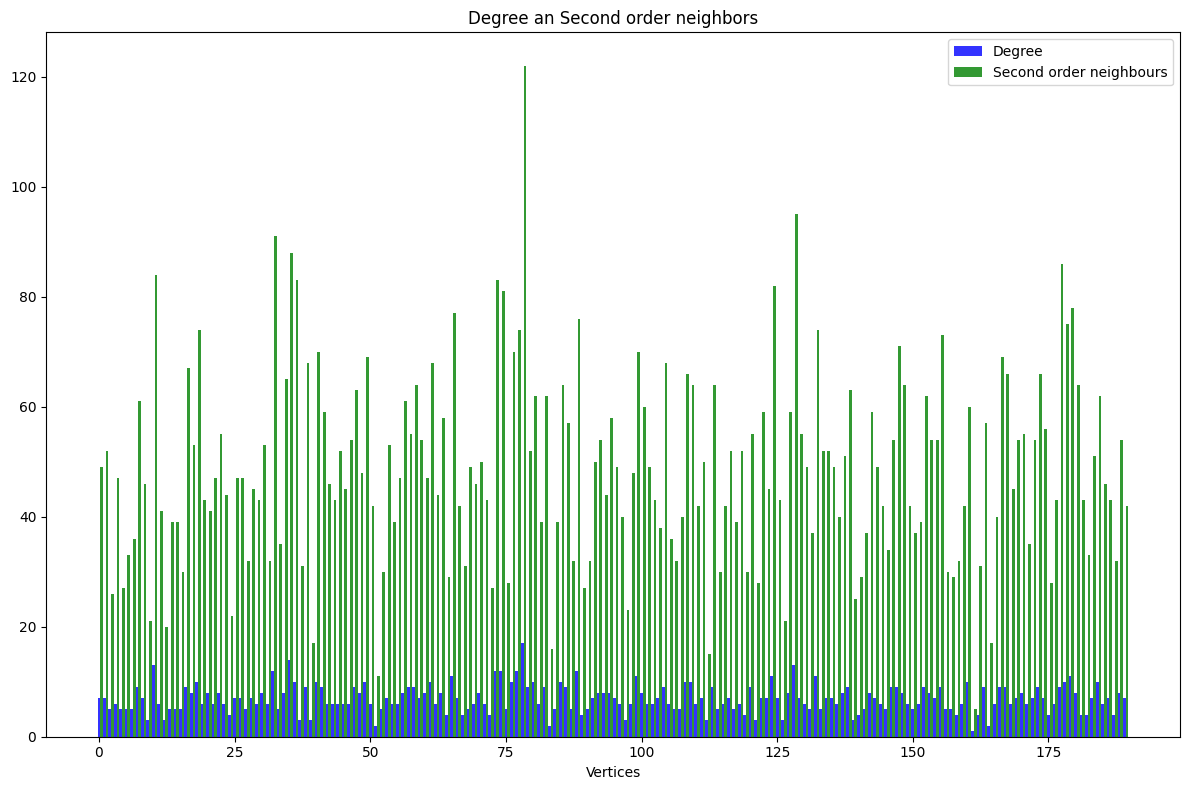

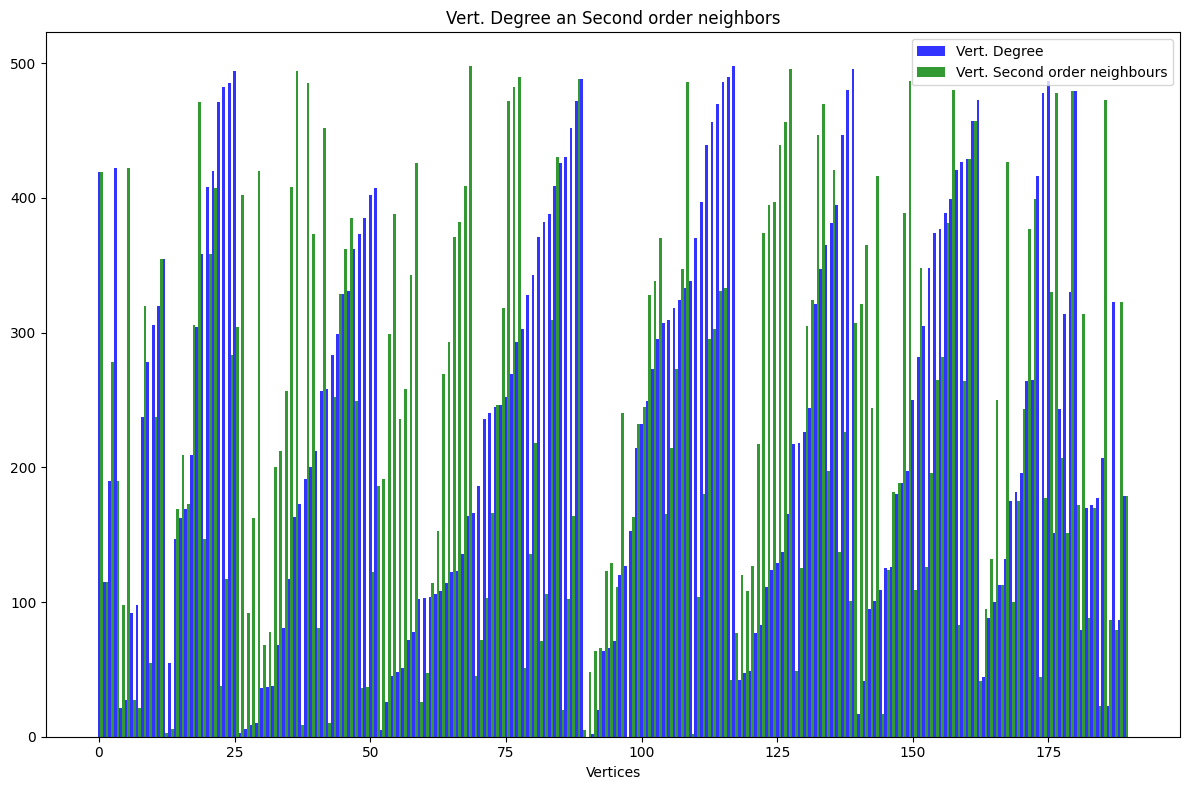

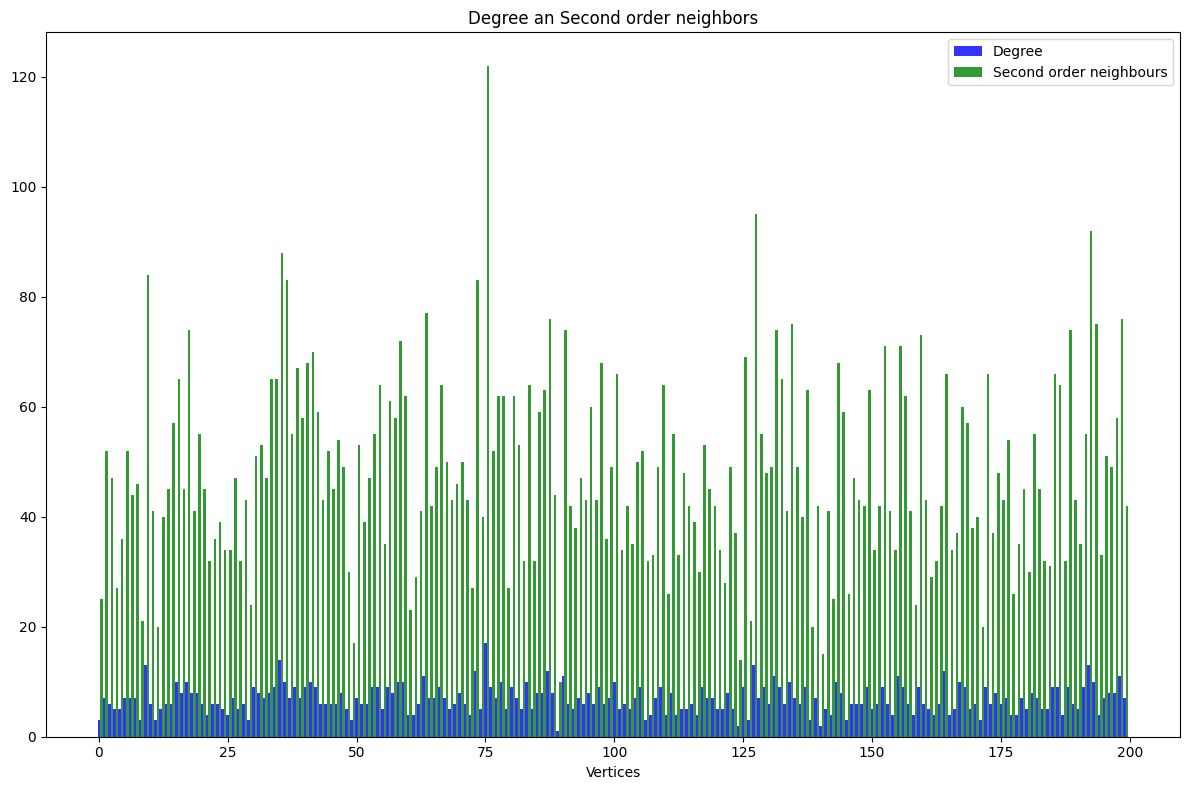

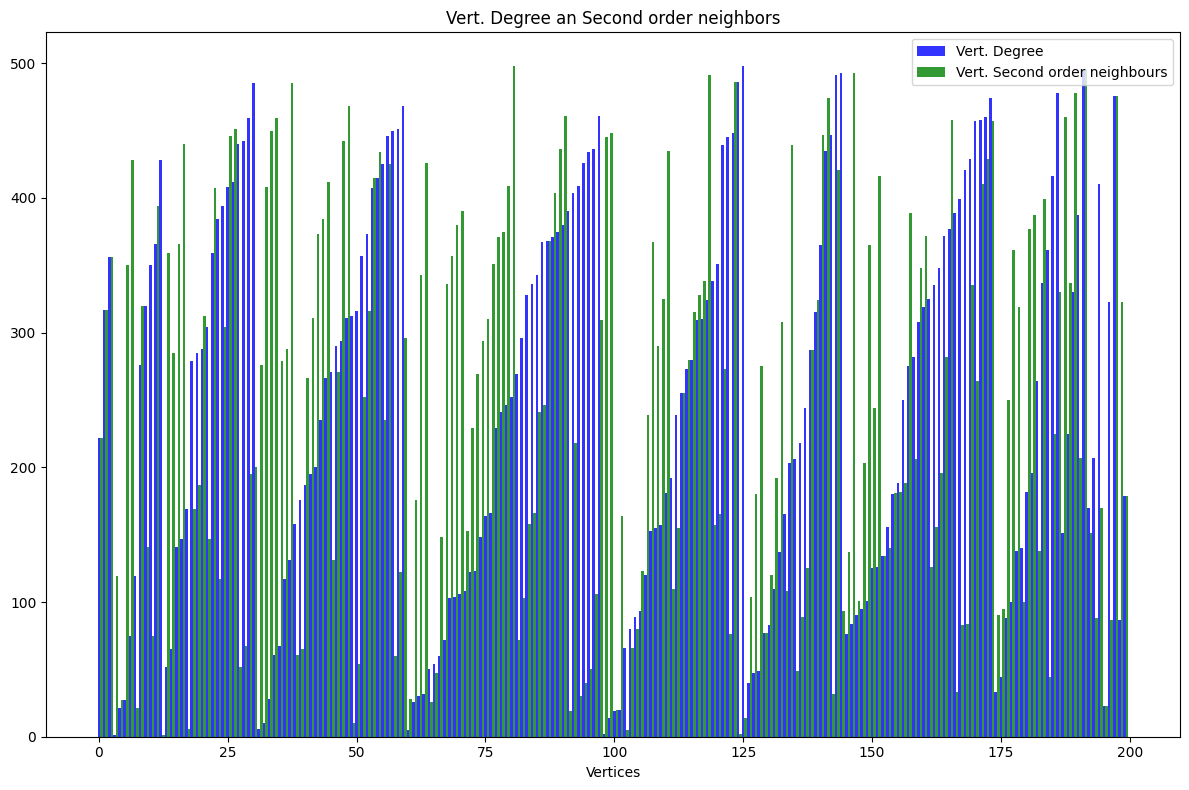

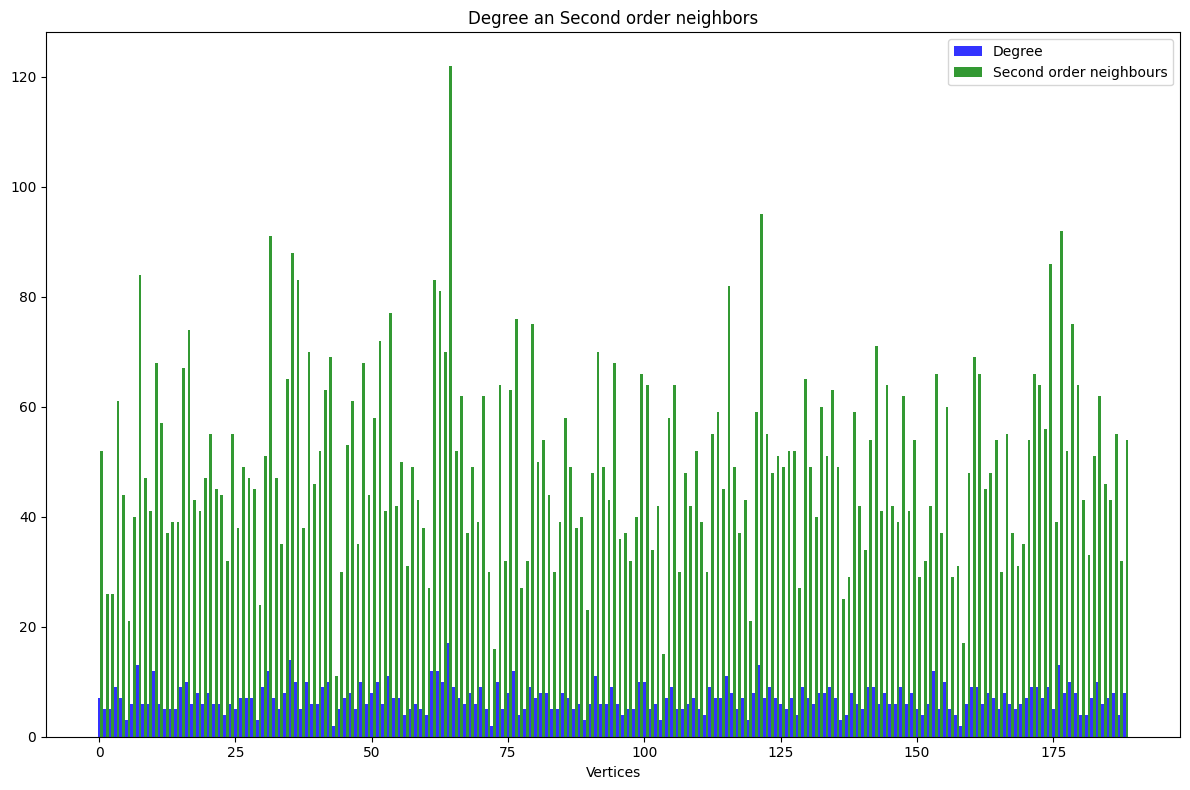

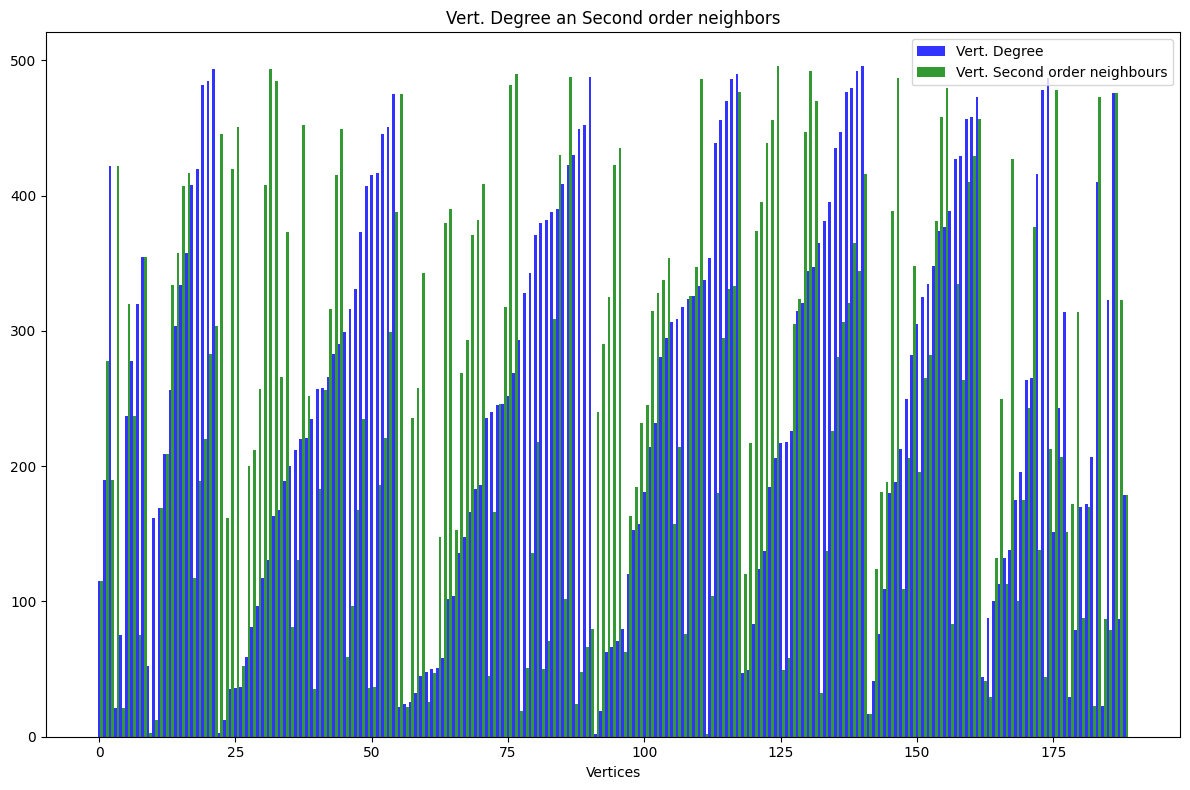

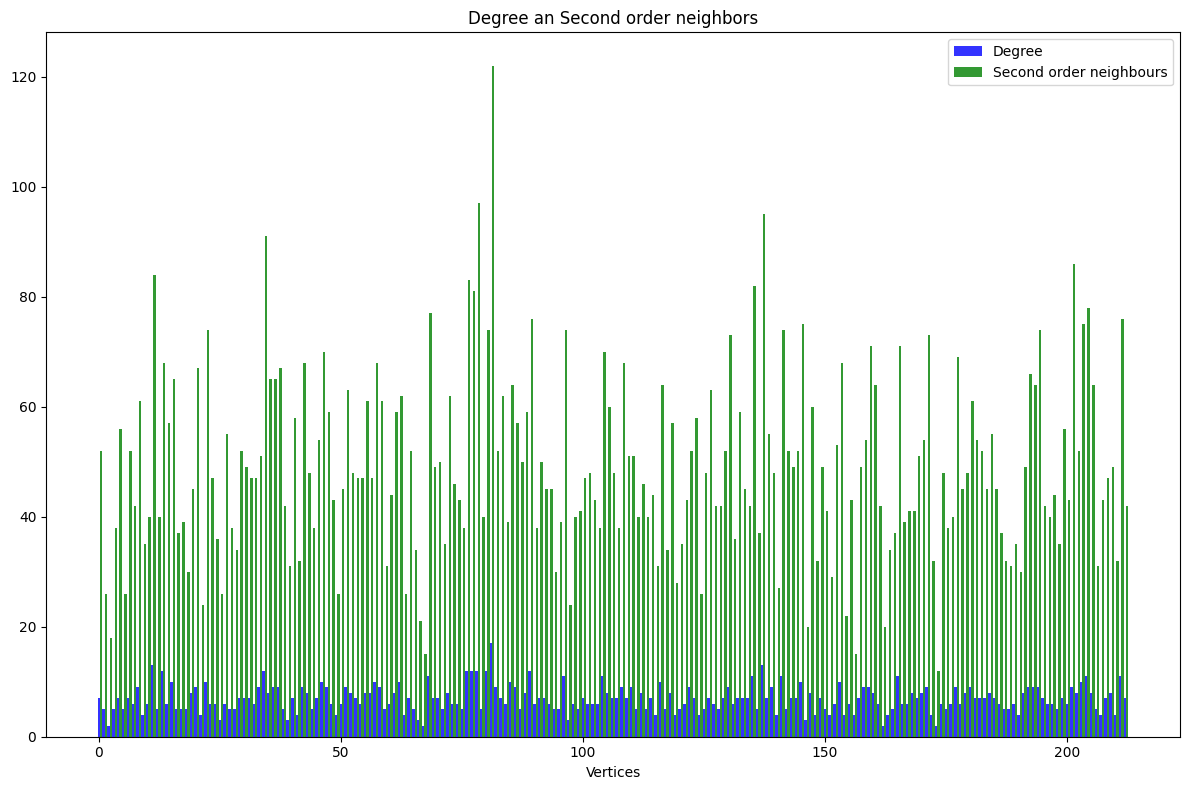

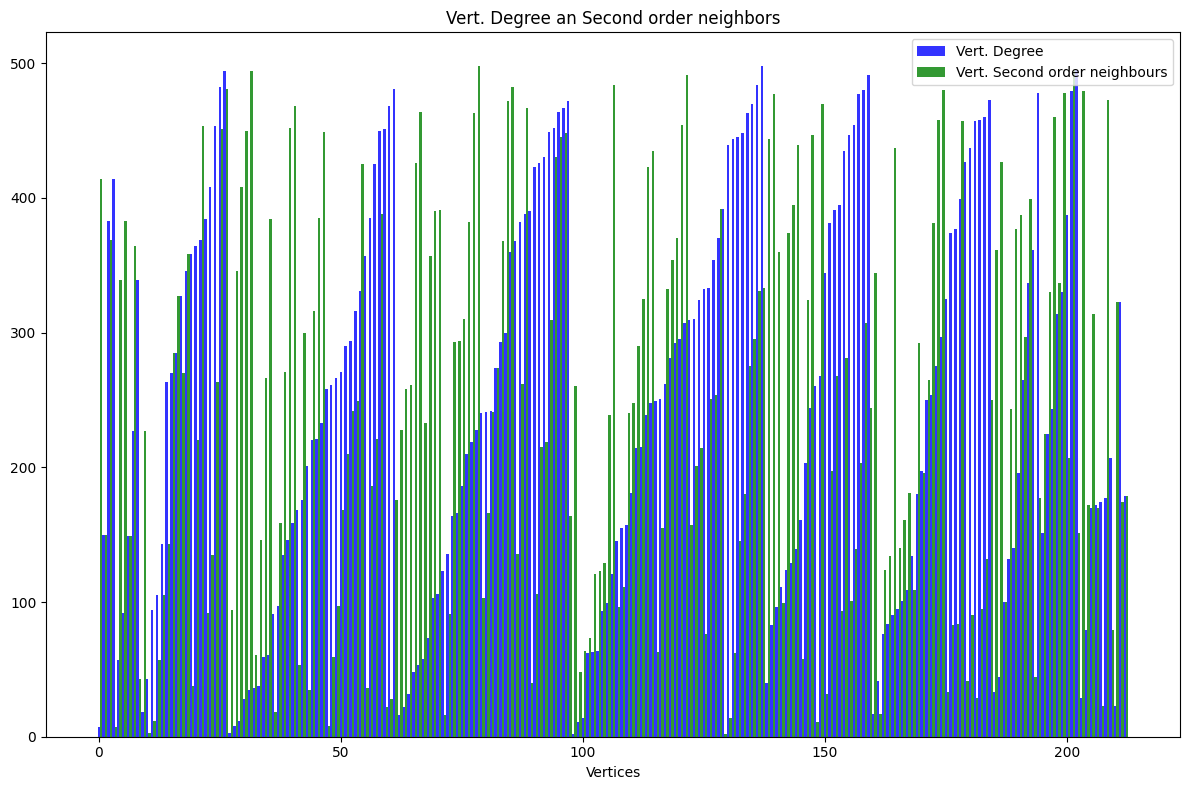

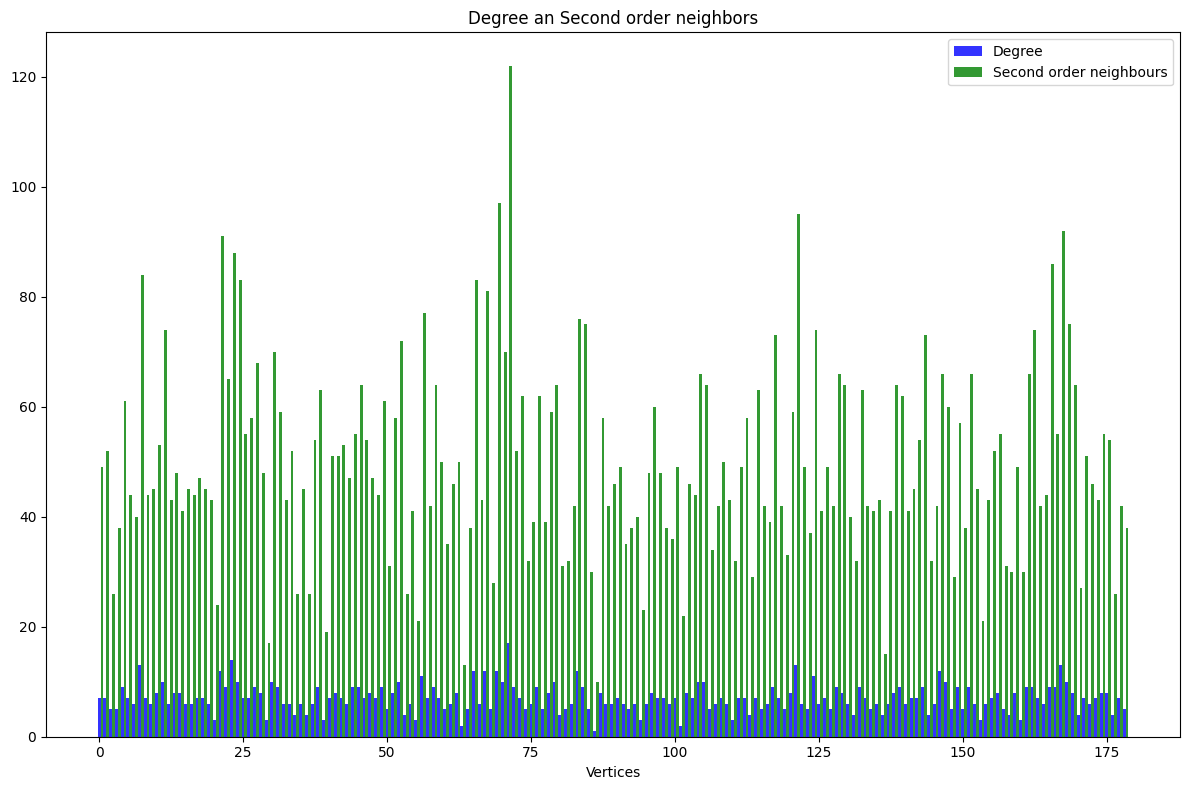

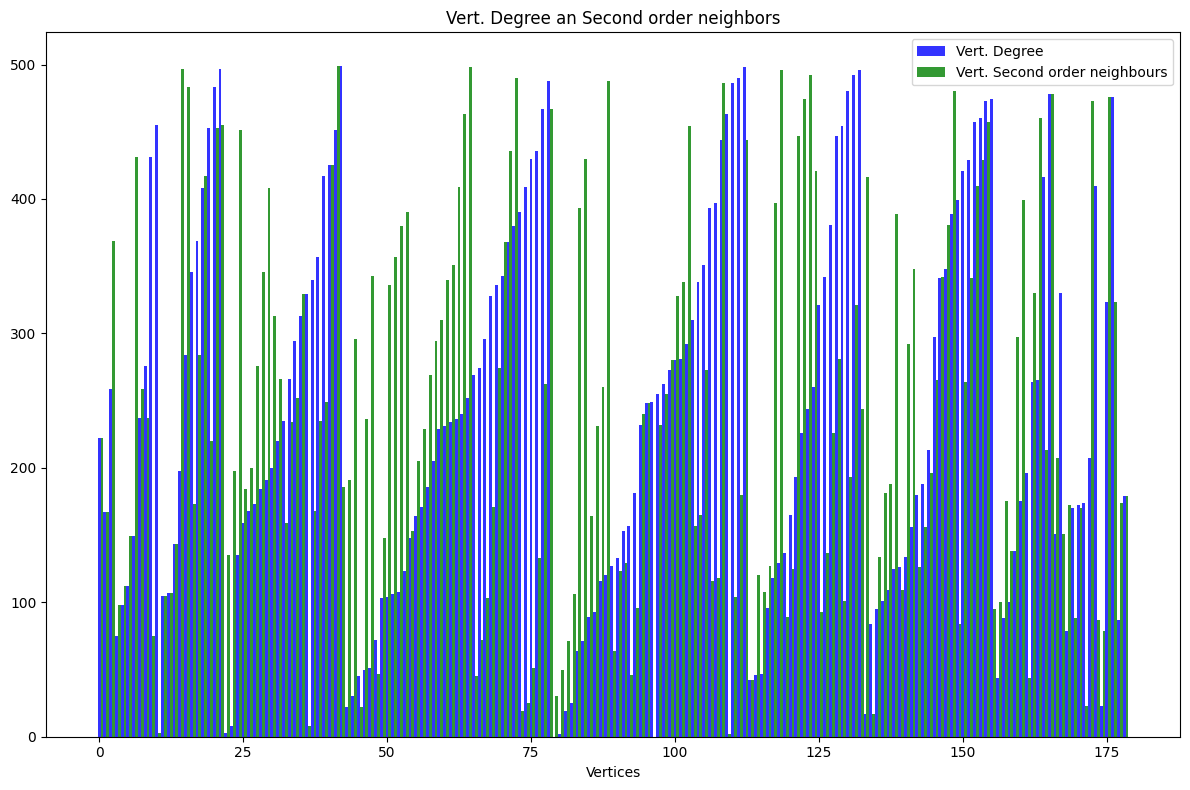

In [26]:
Nsim = 5
N = 500
p = np.log(N)/N
sub_sample_size = 6
MCS(N,sub_sample_size, Nsim,p)